In [26]:
import numpy as np
import pandas as pd
import seaborn as sns

In [27]:
raw_data = pd.read_csv("classification.csv")
df = raw_data.copy()
raw_data.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


### Veri Seti Hikayesi
Veri setinde insanların yaşları ve ilgilerine göre bir branşta başarılı olup olmadıklarına dair basit bir veri setidir. 

### Veri Seti Yapısal Bilgileri

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   interest  297 non-null    float64
 2   success   297 non-null    float64
dtypes: float64(3)
memory usage: 7.1 KB


In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,297.0,23.709718,8.864000,2.34756,17.002148,23.283644,30.661149,45.773729
interest,297.0,46.986527,21.956447,-0.85280,28.689067,45.695926,65.171876,97.175508
success,297.0,0.569024,0.496049,0.00000,0.000000,1.000000,1.000000,1.000000


In [30]:
df.shape

(297, 3)

In [31]:
df.isnull().sum()

age         0
interest    0
success     0
dtype: int64

In [32]:
df.age.value_counts()

12.617491    1
13.972922    1
23.793953    1
19.541457    1
36.480827    1
            ..
14.722866    1
36.999722    1
26.634447    1
25.566818    1
23.191980    1
Name: age, Length: 297, dtype: int64

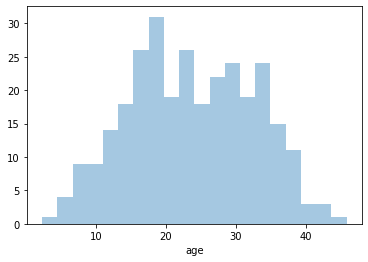

In [33]:
sns.distplot(df.age, bins = 20, kde = False);

In [34]:
df["age"] = round(df["age"]) #Yaş verileri üzerinden bir yuvarlama işlemi yapıldı

In [35]:
df

,age,interest,success
0,24.0,18.859917,0.0
1,23.0,17.969223,0.0
2,33.0,29.463651,0.0
3,7.0,25.704665,1.0
4,14.0,16.770856,0.0
...,...,...,...
292,28.0,18.799309,0.0
293,15.0,72.000352,1.0
294,22.0,68.453459,1.0
295,26.0,90.118212,1.0


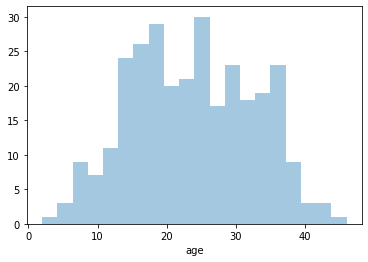

In [36]:
sns.distplot(df.age, bins = 20, kde = False);

In [37]:
df["age"].value_counts() #Yaş verileri için kaçar tane 'interest' girdisi var ?

19.0    18
17.0    16
26.0    15
34.0    14
35.0    12
30.0    12
28.0    11
18.0    11
29.0    11
21.0    11
22.0    11
23.0    10
16.0    10
31.0     9
24.0     9
32.0     9
13.0     9
14.0     9
20.0     9
36.0     8
8.0      7
12.0     6
15.0     6
25.0     6
38.0     6
27.0     6
11.0     5
9.0      5
33.0     5
40.0     3
39.0     3
37.0     3
10.0     2
43.0     2
7.0      2
6.0      2
5.0      1
46.0     1
2.0      1
42.0     1
Name: age, dtype: int64

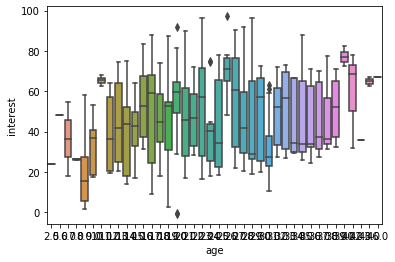

In [38]:
sns.boxplot(x="age",y="interest", data=df)

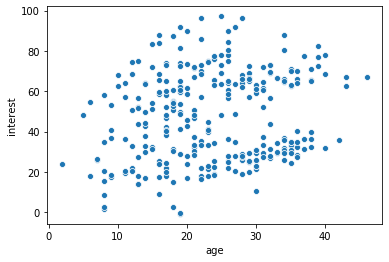

In [39]:
sns.scatterplot(x="age", y="interest", data=df);

In [40]:
df_temp = df.copy()

In [41]:
df_temp["interest"] = round(df_temp["interest"]) #Yuvarlama işlemi bir de 'interest' kolonu için yapıldı ve gözle görülür bir değişim saptanmadı

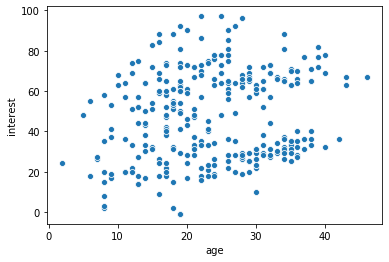

In [42]:
sns.scatterplot(x="age", y="interest", data=df_temp);

In [43]:
df["interest"].values[df["age"] == 24]

array([18.8599168 , 22.57501437, 18.49741411, 34.41849166, 25.53942239,
       65.7206631 , 63.13989046, 76.05503494, 77.71333801])

In [44]:
age_list = df["age"].value_counts().index
age_list

Float64Index([19.0, 17.0, 26.0, 34.0, 35.0, 30.0, 28.0, 18.0, 29.0, 21.0, 22.0,
              23.0, 16.0, 31.0, 24.0, 32.0, 13.0, 14.0, 20.0, 36.0,  8.0, 12.0,
              15.0, 25.0, 38.0, 27.0, 11.0,  9.0, 33.0, 40.0, 39.0, 37.0, 10.0,
              43.0,  7.0,  6.0,  5.0, 46.0,  2.0, 42.0],
             dtype='float64')

In [45]:
dropping_arr = 0
for i in age_list:
    arr = pd.Series(df["interest"].values[df["age"] == i])
    Q1 = arr.quantile(0.25)
    Q3 = arr.quantile(0.75)
    IQR = Q3 - Q1
    alt_sinir = Q1 - 1.5*IQR
    ust_sinir = Q3 + 1.5*IQR
    aykiri = ((arr < alt_sinir) | (arr > ust_sinir)).values
    indexes = (df["interest"].index).values[df["age"] == i]
    outlierr = aykiri
    indexx = np.asarray(indexes)
    temp = pd.DataFrame(data = outlierr, index=indexes)
    temp = temp.rename({0:"outlier"},axis=1)
    dropping =(temp.index[temp["outlier"] == True])
    dropping = np.array(dropping)
    dropping_arr = np.append(dropping_arr, dropping)
    
df = df.drop(dropping_arr)

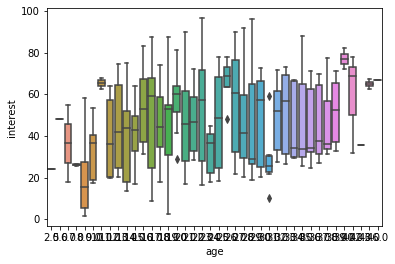

In [46]:
sns.boxplot(x="age",y="interest", data=df);

In [47]:
df

,age,interest,success
1,23.0,17.969223,0.0
2,33.0,29.463651,0.0
3,7.0,25.704665,1.0
4,14.0,16.770856,0.0
5,17.0,21.765215,0.0
...,...,...,...
292,28.0,18.799309,0.0
293,15.0,72.000352,1.0
294,22.0,68.453459,1.0
295,26.0,90.118212,1.0


In [48]:
print(dropping_arr)

[  0 141 187 290   7 249  82 228  76]


Boxplot yöntemi yardımıyla outlier olan veriler data frame üzerinden silme yöntemi ile elimine edilmeye çalışıldı.